In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Collect Data

In [60]:
def get_my_top_artists(sp,limit=50,time_range='short_term'): 
    results = sp.current_user_top_artists(time_range=time_range, limit=limit)
    print('getting top artists')
    res_dict = {'id': [item['id'] for item in results['items']],
                'name': [item['name'] for item in results['items']],
                'num_followers': [item['followers']['total'] for item in results['items']],
                'popularity': [item['popularity'] for item in results['items']],
                'genres': [item['genres'] for item in results['items']]
               }
    return res_dict

def get_my_top_tracks(sp,limit=50,time_range='short_term'): 
    results = sp.current_user_top_tracks(time_range=time_range, limit=limit)
    print('getting top tracks')
    res_dict = {'id': [item['id'] for item in results['items']],
                'name': [item['name'] for item in results['items']],
                'duration': [item['duration_ms'] for item in results['items']],
                'popularity': [item['popularity'] for item in results['items']],
                'album_type': [item['album']['album_type'] for item in results['items']],
                'album_id': [item['album']['id'] for item in results['items']],
                'album_name': [item['album']['name'] for item in results['items']],
                'album_release_date': [item['album']['release_date'] for item in results['items']]
               }
    return res_dict
    

In [35]:
scope = 'user-top-read'
username = ''


token = util.prompt_for_user_token(username, scope)

In [64]:
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    res_artist = get_my_top_artists(sp,limit=50,time_range='short_term')
    res_track = get_my_top_tracks(sp,limit=50,time_range='short_term')
else:
    print("Can't get token for", username)
df_artists = pd.DataFrame.from_dict(res_artist,orient='index').transpose()
df_tracks = pd.DataFrame.from_dict(res_track,orient='index').transpose()
df_artist.head()

getting top artists
getting top tracks


,id,name,num_followers,popularity,genres
0,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,61,"[alternative rock, anti-folk, chamber pop, fol..."
1,2WhoMc7XqIzVXWbQqSoqe7,Kahitna,265647,59,"[indonesian indie, indonesian pop]"
2,7oPftvlwr6VrsViSDV7fJY,Green Day,8614835,82,"[permanent wave, pop punk, punk, rock]"
3,1xU878Z1QtBldR7ru9owdU,Phoenix,1441708,69,"[alternative dance, indie pop, indie rock, ind..."
4,4MXUO7sVCaFgFjoTI5ox5c,Sufjan Stevens,813461,71,"[chamber pop, folk-pop, freak folk, indie folk..."


In [65]:
df_tracks.head()

,id,name,duration,popularity,album_type,album_id,album_name,album_release_date
0,3VR53EGdIj60lrwamMs0RR,Que sera sera,125360,55,SINGLE,3MN4aP8rX5W4OaYMk9SaGc,50's Classics,2011-03-14
1,3Z1kZKYfRC8iRXnYeC5sCJ,Everything Has Changed,245413,68,ALBUM,4jTYApZPMapg56gRycOn0D,Red (Big Machine Radio Release Special),2012-10-21
2,6S18su3fmCpLzBsJCQWovx,Somebody's Me,238376,42,ALBUM,6nokJTCkg6CVxVeeQEQsZL,Insomniac (New International Version Spanish),2007
3,6u2ygh3FjNZMhlrbTYRu6e,I'll Be Your Pilot,255680,40,SINGLE,0ZxTmezPCbP5Xv6wtNEATP,I'll Be Your Pilot,2017-10-10
4,2DxzaQkGr9pQ0nDiijv0wo,Kimi Ga Suki da to Sakebitai,228960,33,SINGLE,3iHCvTjeT7PMxcvq11hjHM,A Voice from Beyond,2016-09-04


In [66]:
df_artist.to_csv('my_top_artists_short_term_50.csv',index=False)
df_tracks.to_csv('my_top_tracks_short_term_50.csv',index=False)

## EDA

In [3]:
# reload data
df_artist = pd.read_csv('my_top_artists_short_term_50.csv')
df_tracks = pd.read_csv('my_top_tracks_short_term_50.csv')

### Among my top artists, who are the most popular and have the most followers?

`popularity` is a score given by Spotify. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

It might be interesting to see how popularity differs from the number of followers that artists have

In [4]:
# top 5 most followers
df_artist.sort_values(by='num_followers',ascending=False)[:5]

,id,name,num_followers,popularity,genres
7,04gDigrS5kc9YWfZHwBETP,Maroon 5,17641410,88,['pop']
10,1dfeR4HaWDbWqFHLkxsg1d,Queen,15254282,93,"['glam rock', 'rock']"
12,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,11708804,88,"['british invasion', 'merseybeat', 'psychedeli..."
2,7oPftvlwr6VrsViSDV7fJY,Green Day,8614835,82,"['permanent wave', 'pop punk', 'punk', 'rock']"
40,7qG3b048QCHVRO5Pv1T5lw,Enrique Iglesias,8261888,80,"['dance pop', 'latin', 'latin pop', 'mexican p..."


In [5]:
# top 5 most popular
df_artist.sort_values(by='popularity',ascending=False)[:5]

,id,name,num_followers,popularity,genres
10,1dfeR4HaWDbWqFHLkxsg1d,Queen,15254282,93,"['glam rock', 'rock']"
7,04gDigrS5kc9YWfZHwBETP,Maroon 5,17641410,88,['pop']
12,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,11708804,88,"['british invasion', 'merseybeat', 'psychedeli..."
5,20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco,6685593,88,"['emo', 'modern rock', 'pop punk']"
42,0hEurMDQu99nJRq8pTxO14,John Mayer,3653423,87,"['neo mellow', 'pop', 'pop rock', 'singer-song..."


In [11]:
df_artist['num_followers_mil'] = df_artist.num_followers.divide(1000000)

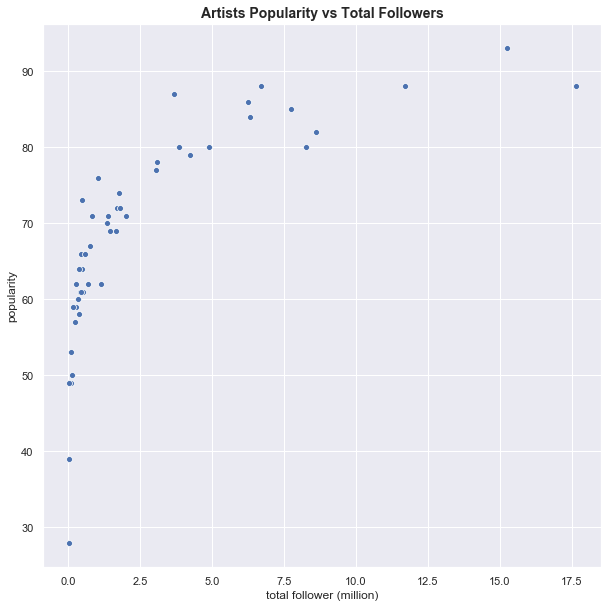

In [18]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x='num_followers_mil',y='popularity',data=df_artist)

#formatting
plt.title('Artists Popularity vs Total Followers', weight='bold', fontsize=14)
plt.xlabel('total follower (million)')

### Top artists genres

In [59]:
def splitListToRows(row,row_accumulator,target_column,separator):
    '''
    unstack genres list into rows
    '''
    row[target_column] = row[target_column].strip('[]')
    split_row = row[target_column].split(separator)
    for s in split_row:
        new_row = row.to_dict()
        new_row[target_column] = s.strip("' ")
        row_accumulator.append(new_row)
        
new_rows = []
df_artist.apply(splitListToRows,axis=1,args = (new_rows,'genres',','))
new_df = pd.DataFrame(new_rows)
new_df

,genres,id,name,num_followers,num_followers_mil,popularity
0,alternative rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
1,anti-folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
2,chamber pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
3,folk-pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
4,indie folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
5,indie pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
6,indie rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
7,lo-fi,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
8,melancholia,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
9,modern rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61


In [61]:
new_df.genres.value_counts()[:5]

modern rock    13
pop rock       11
pop punk       10
rock           10
indie rock      9
Name: genres, dtype: int64

In [67]:
new_df.genres.unique()

array(['alternative rock', 'anti-folk', 'chamber pop', 'folk-pop',
       'indie folk', 'indie pop', 'indie rock', 'lo-fi', 'melancholia',
       'modern rock', 'pop rock', 'scottish indie', 'scottish rock',
       'twee pop', 'indonesian indie', 'indonesian pop', 'permanent wave',
       'pop punk', 'punk', 'rock', 'alternative dance', 'indietronica',
       'new rave', 'freak folk', 'singer-songwriter', 'stomp and holler',
       'emo', 'canadian punk', 'canadian rock', 'post-grunge', 'pop',
       'adult standards', 'canadian pop', 'lounge', 'bebop', 'christmas',
       'cool jazz', 'jazz', 'jazz trumpet', 'vocal jazz', 'glam rock',
       'british invasion', 'merseybeat', 'psychedelic rock',
       'indonesian jazz', '', 'britpop', 'dance rock', 'electronic',
       'garage rock', 'madchester', 'new wave', 'dance pop', 'neo mellow',
       'post-teen pop', 'r&b', 'viral pop', 'candy pop', 'uk post-punk',
       'alternative metal', 'screamo', 'skate punk', 'australian pop',
       

In [70]:
def is_rock(r):
    if "rock" in r:
        return 1
    else:
        return 0

def is_pop(r):
    if "pop" in r:
        return 1
    else:
        return 0

def is_indie(r):
    if "indie" in r:
        return 1 
    else:
        return 0

In [72]:
new_df['is_rock'] = new_df.genres.apply(is_rock)
new_df['is_pop'] = new_df.genres.apply(is_pop)
new_df['is_indie'] = new_df.genres.apply(is_indie)
new_df.head()

,genres,id,name,num_followers,num_followers_mil,popularity,is_rock,is_pop,is_indie
0,alternative rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,0,0
1,anti-folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,0,0,0
2,chamber pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,0,1,0
3,folk-pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,0,1,0
4,indie folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,0,0,1


In [74]:
artist_genre_flag = new_df.groupby('id')[['is_rock','is_pop','is_indie']].max().reset_index()
artist_genre_flag 

,id,is_rock,is_pop,is_indie
0,04gDigrS5kc9YWfZHwBETP,0,1,0
1,07QEuhtrNmmZ0zEcqE9SF6,1,1,0
2,0FcNSKwWZJb98ry9M2qEII,0,0,0
3,0Vw76uk7P8yVtTClWyOhac,0,0,0
4,0hEurMDQu99nJRq8pTxO14,1,1,0
5,0nmQIMXWTXfhgOBdNzhGOs,0,0,0
6,0p4nmQO2msCgU4IF37Wi3j,0,1,0
7,16eRpMNXSQ15wuJoeqguaB,1,1,1
8,18PmEN8ZiHBQlDpxrgR2xs,0,1,1
9,19I4tYiChJoxEO5EuviXpz,0,1,0


In [77]:
def is_others(r):
    if r['is_rock'] + r['is_pop'] + r['is_indie'] == 0:
        return 1
    else:
        return 0
artist_genre_flag['is_others'] = artist_genre_flag[['is_rock','is_pop','is_indie']].apply(is_others,axis=1)
artist_genre_flag.head()

,id,is_rock,is_pop,is_indie,is_others
0,04gDigrS5kc9YWfZHwBETP,0,1,0,0
1,07QEuhtrNmmZ0zEcqE9SF6,1,1,0,0
2,0FcNSKwWZJb98ry9M2qEII,0,0,0,1
3,0Vw76uk7P8yVtTClWyOhac,0,0,0,1
4,0hEurMDQu99nJRq8pTxO14,1,1,0,0


In [78]:
new_df = new_df.drop(['is_rock','is_pop','is_indie'],axis=1)
new_df

,genres,id,name,num_followers,num_followers_mil,popularity
0,alternative rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
1,anti-folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
2,chamber pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
3,folk-pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
4,indie folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
5,indie pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
6,indie rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
7,lo-fi,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
8,melancholia,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61
9,modern rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61


In [79]:
new_df = new_df.merge(artist_genre_flag, on='id')
new_df.head()

,genres,id,name,num_followers,num_followers_mil,popularity,is_rock,is_pop,is_indie,is_others
0,alternative rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
1,anti-folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
2,chamber pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
3,folk-pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
4,indie folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0


In [80]:
new_df

,genres,id,name,num_followers,num_followers_mil,popularity,is_rock,is_pop,is_indie,is_others
0,alternative rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
1,anti-folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
2,chamber pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
3,folk-pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
4,indie folk,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
5,indie pop,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
6,indie rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
7,lo-fi,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
8,melancholia,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0
9,modern rock,4I2BJf80C0skQpp1sQmA0h,Belle & Sebastian,385767,0.385767,61,1,1,1,0


apparently, rock artists are the most represented among my top artists on Spotify

## How many tracks per album are in my top tracks?

To see how diverse is my interest. are my top tracks concentrated only on certain albums or not?

In [24]:
df_tracks.groupby('album_name')['id'].count().sort_values(ascending=False)[:5]

album_name
How to Solve Our Human Problems (Part 3)    3
Write About Love                            2
If You're Feeling Sinister                  2
Wanted on Voyage                            2
Third Eye Blind                             2
Name: id, dtype: int64

I like Belle & Sebastian! 3 of their albums are among the most tracks on my top tracks

## What is the median duration of the tracks?

In [26]:
df_tracks.duration.median(),df_tracks.duration.min(),df_tracks.duration.max()

(228000.0, 83560, 338933)

In [27]:
df_tracks['duration_mins'] = df_tracks.duration.divide(60000)

In [28]:
df_tracks.duration_mins.median(),df_tracks.duration_mins.min(),df_tracks.duration_mins.max()

(3.8, 1.3926666666666667, 5.648883333333333)

### album release date

In [62]:
df_tracks.head()

,id,name,duration,popularity,album_type,album_id,album_name,album_release_date,duration_mins
0,3VR53EGdIj60lrwamMs0RR,Que sera sera,125360,55,SINGLE,3MN4aP8rX5W4OaYMk9SaGc,50's Classics,2011-03-14,2.089333
1,3Z1kZKYfRC8iRXnYeC5sCJ,Everything Has Changed,245413,68,ALBUM,4jTYApZPMapg56gRycOn0D,Red (Big Machine Radio Release Special),2012-10-21,4.090217
2,6S18su3fmCpLzBsJCQWovx,Somebody's Me,238376,42,ALBUM,6nokJTCkg6CVxVeeQEQsZL,Insomniac (New International Version Spanish),2007,3.972933
3,6u2ygh3FjNZMhlrbTYRu6e,I'll Be Your Pilot,255680,40,SINGLE,0ZxTmezPCbP5Xv6wtNEATP,I'll Be Your Pilot,2017-10-10,4.261333
4,2DxzaQkGr9pQ0nDiijv0wo,Kimi Ga Suki da to Sakebitai,228960,33,SINGLE,3iHCvTjeT7PMxcvq11hjHM,A Voice from Beyond,2016-09-04,3.816000


In [84]:
df_tracks['album_release_date'] = pd.to_datetime(df_tracks['album_release_date'] ,errors='coerce')
df_tracks['album_release_date']

0    2011-03-14
1    2012-10-21
2    2007-01-01
3    2017-10-10
4    2016-09-04
5    1998-01-01
6    2018-01-19
7    1997-04-08
8    2015-01-19
9    2006-01-01
10   2006-01-01
11   2014-06-27
12   2000-06-05
13   2004-03-16
14   2012-06-19
15   2018-02-16
16   2018-10-30
17   2010-10-08
18   2018-02-13
19   2015-09-04
20   2004-08-17
21   2014-06-27
22   2003-10-06
23   1996-11-18
24   1997-04-08
25   2011-12-09
26   2018-04-25
27   2017-08-21
28   2017-06-09
29   1996-11-18
30   2001-01-01
31   2006-07-31
32   1994-02-01
33   2015-08-31
34   2009-03-13
35   2018-02-16
36   2018-02-16
37   2003-01-01
38   2007-09-05
39   2010-11-09
40   2010-10-08
41   1970-04-17
42   2006-01-01
43   2003-10-06
44   2015-05-18
45   2005-08-08
46   2007-01-01
47   2015-01-19
48   2008-03-24
49   2018-05-11
Name: album_release_date, dtype: datetime64[ns]

In [85]:
df_tracks['album_release_year'] = df_tracks['album_release_date'].dt.year
df_tracks.head()

,id,name,duration,popularity,album_type,album_id,album_name,album_release_date,duration_mins,album_release_year
0,3VR53EGdIj60lrwamMs0RR,Que sera sera,125360,55,SINGLE,3MN4aP8rX5W4OaYMk9SaGc,50's Classics,2011-03-14,2.089333,2011
1,3Z1kZKYfRC8iRXnYeC5sCJ,Everything Has Changed,245413,68,ALBUM,4jTYApZPMapg56gRycOn0D,Red (Big Machine Radio Release Special),2012-10-21,4.090217,2012
2,6S18su3fmCpLzBsJCQWovx,Somebody's Me,238376,42,ALBUM,6nokJTCkg6CVxVeeQEQsZL,Insomniac (New International Version Spanish),2007-01-01,3.972933,2007
3,6u2ygh3FjNZMhlrbTYRu6e,I'll Be Your Pilot,255680,40,SINGLE,0ZxTmezPCbP5Xv6wtNEATP,I'll Be Your Pilot,2017-10-10,4.261333,2017
4,2DxzaQkGr9pQ0nDiijv0wo,Kimi Ga Suki da to Sakebitai,228960,33,SINGLE,3iHCvTjeT7PMxcvq11hjHM,A Voice from Beyond,2016-09-04,3.816000,2016


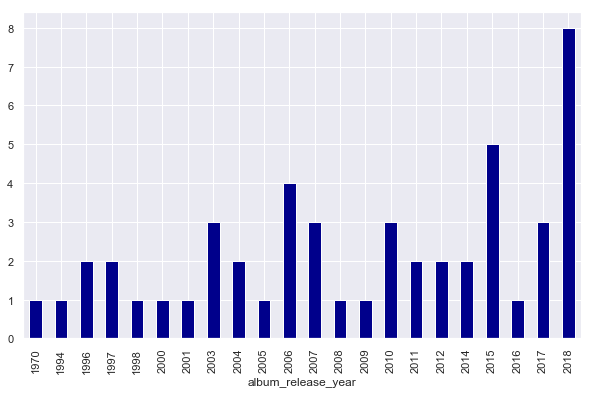

In [91]:
df_tracks.groupby('album_release_year').id.nunique().plot.bar(color='darkblue', figsize=(10,6))